# Predicting prices on Audi cars

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

audi = pd.read_csv('audi.csv')
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [52]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


# Visualizing some metrics

In [53]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


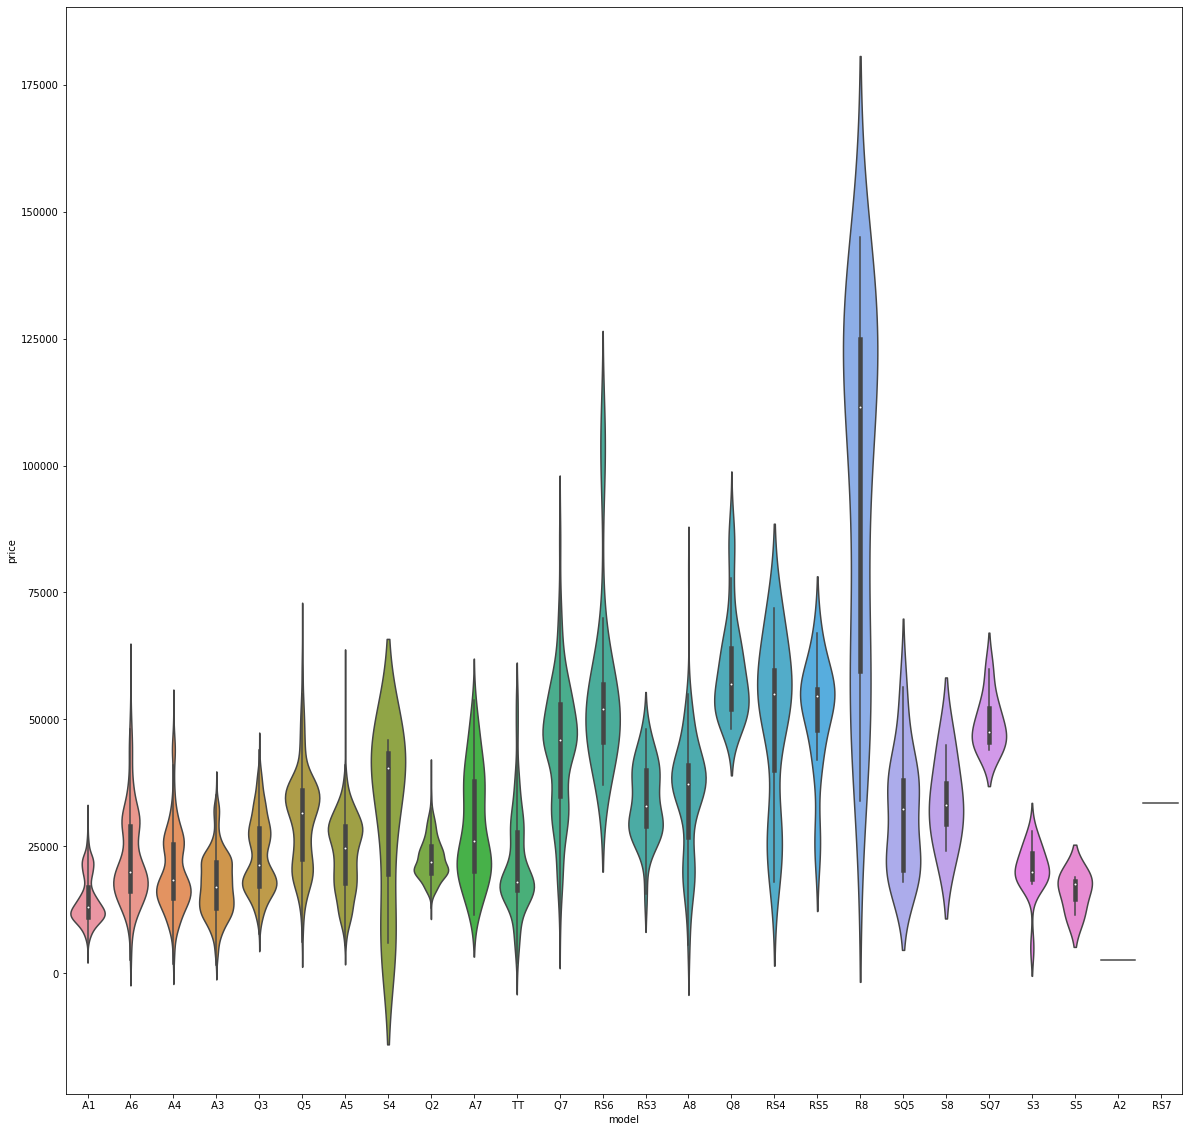

In [54]:
fig = plt.figure(figsize=(20,20))
sns.violinplot(x='model',y='price',data=audi,scale='width')

Getting categories for object columns.

In [55]:
audi_one = pd.get_dummies(audi,columns=['model', 'transmission','fuelType'])

In [56]:
audi_one.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


Finding correlation between features and the target column.

In [57]:
audi_one.corrwith(audi_one['price'])

year                      0.592581
price                     1.000000
mileage                  -0.535357
tax                       0.356157
mpg                      -0.600334
engineSize                0.591262
model_ A1                -0.278076
model_ A2                -0.016867
model_ A3                -0.220113
model_ A4                -0.086946
model_ A5                 0.017438
model_ A6                -0.004719
model_ A7                 0.054804
model_ A8                 0.109107
model_ Q2                -0.009366
model_ Q3                 0.003427
model_ Q5                 0.192868
model_ Q7                 0.367410
model_ Q8                 0.256350
model_ R8                 0.327367
model_ RS3                0.053039
model_ RS4                0.125603
model_ RS5                0.126436
model_ RS6                0.170989
model_ RS7                0.008756
model_ S3                -0.008834
model_ S4                 0.023924
model_ S5                -0.009903
model_ S8           

In [58]:
audi_nofueltype = audi_one.drop(['fuelType_Diesel','fuelType_Hybrid','fuelType_Petrol'], axis=1)

# Predictions

Looking for the best regression model to find the best score in order to predict prices.

In [59]:
from sklearn.model_selection import train_test_split
X = audi_nofueltype.drop(['price'],axis=1)
y = audi_nofueltype['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8758110113153219

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2,criterion='mse')
gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)

0.9243165393015876

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)

0.9268130482492298

In [68]:
results = X_test.copy()
results['predicted_lr'] = lr.predict(X_test)
results['predicted_gbr'] = gbr.predict(X_test)
results['predicted_dtr'] = dtr.predict(X_test)
results['Real']= y_test
results = results[['predicted_lr', 'predicted_gbr', 'predicted_dtr', 'Real']]
results

,predicted_lr,predicted_gbr,predicted_dtr,Real
7646,28330.388151,28402.593051,32788.0,33888
7313,22872.178531,21510.813949,21500.0,20000
4402,22980.581099,22818.847102,20750.0,18000
1032,27539.654637,27170.458225,26850.0,27444
4929,16452.107236,13423.810354,14000.0,14490
...,...,...,...,...
4367,14658.100582,13911.959440,11899.0,13495
5157,26180.982505,25397.237607,23888.0,25690
5018,37963.995174,44025.230710,37980.0,43990
1682,20607.588639,20433.325844,21382.0,20690


Text(1012.1529411764707, 0.5, 'Real')

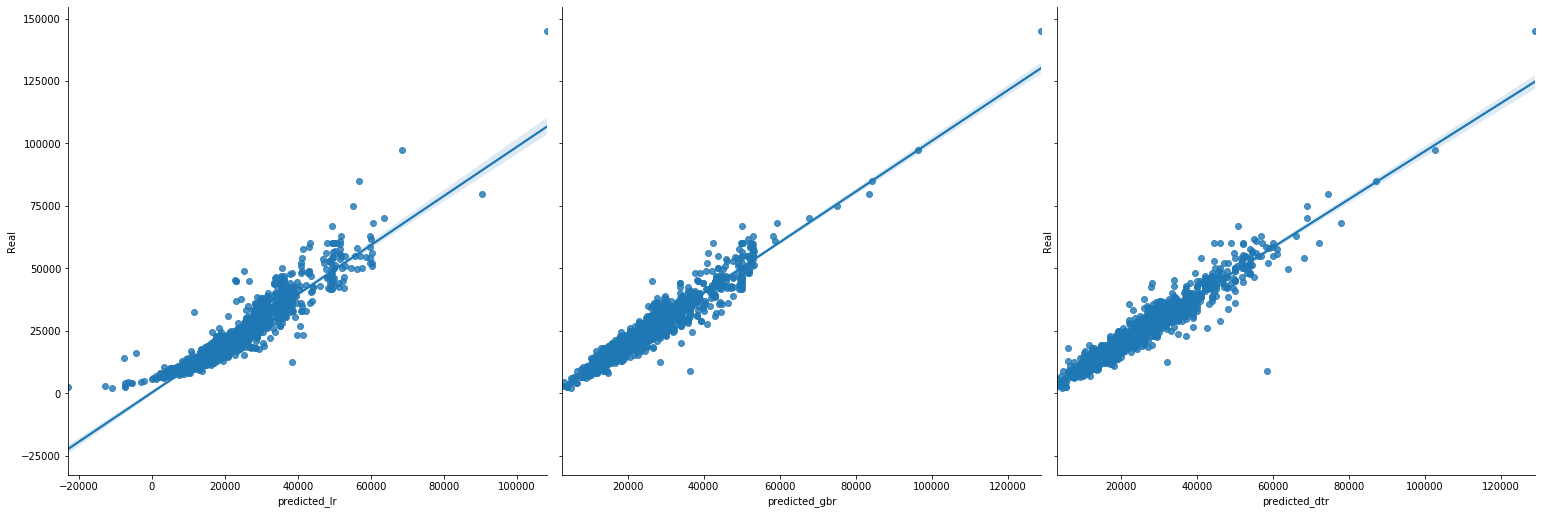

In [97]:
sns.pairplot(results,x_vars=['predicted_lr', 'predicted_gbr','predicted_dtr'],y_vars=['Real'],kind='reg',height=7,aspect=1)

Seems like the best model for this set DecisionTreeRegressor. The graph above shows that Tree model fits the best with the actual price of Audi cars.